In [1]:
from keras.utils import plot_model
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, UpSampling2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.callbacks import Callback
from keras.optimizers import Adam
import random
import glob
import wandb
from wandb.keras import WandbCallback
import subprocess
import os
from PIL import Image
import numpy as np
import cv2
from keras import backend as K
from skimage import io, color

Using TensorFlow backend.


In [2]:
from collections import namedtuple
config = namedtuple('config', ['height', 'width'])
config.height = 256
config.width = 256

In [10]:
def perceptual_distance(y_true, y_pred):
    rmean = ( y_true[:,:,:,0] + y_pred[:,:,:,0] ) / 2;
    r = y_true[:,:,:,0] - y_pred[:,:,:,0]
    g = y_true[:,:,:,1] - y_pred[:,:,:,1]
    b = y_true[:,:,:,2] - y_pred[:,:,:,2]
    
    return K.mean(K.sqrt((((512+rmean)*r*r)/256) + 4*g*g + (((767-rmean)*b*b)/256)));

In [13]:
from keras.models import load_model
model = load_model('colorizer-applied-dl/wandb/run-20190407_023019-swgz5rs6/model-best.h5', custom_objects={'perceptual_distance': perceptual_distance})

In [44]:
for layer in model.layers:
    print(layer, layer.input_shape)

<keras.layers.core.Reshape object at 0x7f897c677240> (None, 256, 256)
<keras.layers.convolutional.Conv2D object at 0x7f897c677550> (None, 256, 256, 1)
<keras.layers.pooling.MaxPooling2D object at 0x7f897c6775c0> (None, 256, 256, 32)
<keras.layers.convolutional.Conv2D object at 0x7f897c677358> (None, 128, 128, 32)
<keras.layers.pooling.MaxPooling2D object at 0x7f89687f46d8> (None, 128, 128, 32)
<keras.layers.convolutional.Conv2D object at 0x7f89687f4080> (None, 64, 64, 32)
<keras.layers.convolutional.UpSampling2D object at 0x7f8968790cf8> (None, 64, 64, 32)
<keras.layers.convolutional.Conv2D object at 0x7f8968790b70> (None, 128, 128, 32)
<keras.layers.convolutional.UpSampling2D object at 0x7f89687a7588> (None, 128, 128, 32)
<keras.layers.convolutional.Conv2D object at 0x7f89687a72e8> (None, 256, 256, 32)


In [46]:
img = Image.open('colorizer-applied-dl/test/amazing-beautiful-beauty-blue.jpg').resize((config.width, config.height))
color_image= np.expand_dims(np.array(img), axis=0)
bw_image = np.expand_dims(np.array(img.convert('L')), axis=0)

In [47]:
color_image.shape, bw_image.shape

((1, 256, 256, 3), (1, 256, 256))

In [48]:

model.evaluate(x=bw_image, y=color_image,batch_size=1)



1/1 [==============================] - 1s 1s/step


[1210.434814453125, 89.22489166259766]

In [5]:
plot_model(model, to_file='model.png')

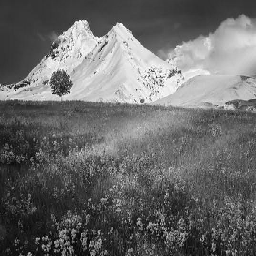

In [52]:
img.convert('L')

In [51]:
out = model.predict(x=bw_image)

In [61]:
im = Image.fromarray(out[0].astype('uint8'))

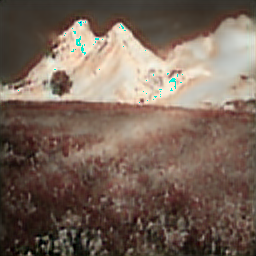

In [62]:
im

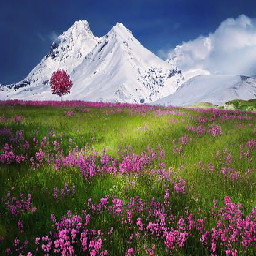

In [63]:
img